In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


bluff nz
kaitangata nz
srednekolymsk ru
torbay ca
geraldton au
bredasdorp za
hithadhoo mv
comodoro rivadavia ar
nalut ly
rikitea pf
castro cl
bluff nz
atuona pf
yulara au
egvekinot ru
yellowknife ca
bambous virieux mu
port hardy ca
tyler us
ilulissat gl
chuy uy
hami cn
bathsheba bb
mys shmidta ru
cherskiy ru
parbhani in
esperance au
aklavik ca
dikson ru
qaanaaq gl
chuy uy
mataura pf
illoqqortoormiut gl
vawkavysk by
ilulissat gl
rikitea pf
saldanha za
nizhneyansk ru
bengkulu id
busselton au
rikitea pf
bluff nz
preobrazheniye ru
vila vu
ushuaia ar
samana do
ushuaia ar
mataura pf
bilma ne
pitimbu br
ust-kuyga ru
mataura pf
san policarpo ph
hobart au
asfi ma
shchelyayur ru
tubruq ly
den helder nl
bluff nz
port alfred za
husavik is
mataura pf
deputatskiy ru
ixtapa mx
ushuaia ar
arman ru
hasaki jp
punta arenas cl
komsomolskiy ru
sao filipe cv
ushuaia ar
sambava mg
naze jp
cape town za
port lincoln au
hobart au
artyk ru
klyuchi ru
ribeira grande pt
grindavik is
saint anthony ca
tabiauea ki
ki

hasaki jp
albany au
katobu id
rikitea pf
kalabo zm
mar del plata ar
la orilla mx
barcelos br
tuy hoa vn
cape town za
hithadhoo mv
punta arenas cl
rikitea pf
albany au
arraial do cabo br
busselton au
mataura pf
kavaratti in
gudari in
beloha mg
albany au
llanes es
leh in
lavrentiya ru
hilo us
yuncheng cn
pavlovsk ru
taolanaro mg
luanda ao
san patricio mx
nizhneyansk ru
rikitea pf
busselton au
college us
laguna br
rikitea pf
padang id
carnarvon au
cabra ph
iqaluit ca
shimoda jp
busselton au
tuktoyaktuk ca
busselton au
tabas ir
whitehorse ca
yellowknife ca
cherskiy ru
ushuaia ar
high rock bs
mataura pf
vaini to
rikitea pf
chuy uy
kabinda cd
lasa cn
palabuhanratu id
kluang my
yumen cn
sao filipe cv
lorengau pg
fortuna us
albany au
rioja pe
bluff nz
sao joao da barra br
mount isa au
suntar ru
jamestown sh
barrow us
soe id
cape town za
zaranj af
vaitupu wf
saleaula ws
kaeo nz
sorland no
new norfolk au
umzimvubu za
chuy uy
axim gh
bonavista ca
korla cn
butaritari ki
cadolzburg de
ushuaia ar
sa

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | kaitangata
Processing Record 3 of Set 1 | srednekolymsk
Processing Record 4 of Set 1 | torbay
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | comodoro rivadavia
Processing Record 9 of Set 1 | nalut
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | yulara
Processing Record 14 of Set 1 | egvekinot
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | port hardy
Processing Record 18 of Set 1 | tyler
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | hami
Processing Record 22 of Set 1 | bathsheba
Processing Record 23 of Set 1 | mys s

Processing Record 39 of Set 4 | nadym
Processing Record 40 of Set 4 | grand gaube
Processing Record 41 of Set 4 | monrovia
Processing Record 42 of Set 4 | san martin
Processing Record 43 of Set 4 | byron bay
Processing Record 44 of Set 4 | bandar-e lengeh
Processing Record 45 of Set 4 | chukhloma
Processing Record 46 of Set 4 | belmonte
Processing Record 47 of Set 4 | vostok
Processing Record 48 of Set 4 | kilindoni
Processing Record 49 of Set 4 | ancud
Processing Record 50 of Set 4 | yeppoon
Processing Record 1 of Set 5 | chopinzinho
Processing Record 2 of Set 5 | pevek
Processing Record 3 of Set 5 | faanui
Processing Record 4 of Set 5 | namibe
Processing Record 5 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 5 | progreso
Processing Record 7 of Set 5 | saskylakh
Processing Record 8 of Set 5 | gigmoto
Processing Record 9 of Set 5 | meulaboh
Processing Record 10 of Set 5 | lake jackson
Processing Record 11 of Set 5 | seoul
Processing Record 12 of Set 5 | bai

Processing Record 31 of Set 8 | pavlovsk
Processing Record 32 of Set 8 | luanda
Processing Record 33 of Set 8 | college
Processing Record 34 of Set 8 | padang
Processing Record 35 of Set 8 | cabra
Processing Record 36 of Set 8 | shimoda
Processing Record 37 of Set 8 | high rock
Processing Record 38 of Set 8 | kabinda
Processing Record 39 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 40 of Set 8 | kluang
Processing Record 41 of Set 8 | yumen
Processing Record 42 of Set 8 | rioja
Processing Record 43 of Set 8 | sao joao da barra
Processing Record 44 of Set 8 | mount isa
Processing Record 45 of Set 8 | suntar
Processing Record 46 of Set 8 | soe
Processing Record 47 of Set 8 | zaranj
Processing Record 48 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 49 of Set 8 | sorland
Processing Record 50 of Set 8 | axim
Processing Record 1 of Set 9 | bonavista
Processing Record 2 of Set 9 | korla
Processing Record 3 of Set 9 | cadolzburg
Processing Record 4 o

Processing Record 20 of Set 12 | vao
Processing Record 21 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 22 of Set 12 | samusu
City not found. Skipping...
Processing Record 23 of Set 12 | uhlove
Processing Record 24 of Set 12 | samdari
Processing Record 25 of Set 12 | evensk
Processing Record 26 of Set 12 | praia da vitoria
Processing Record 27 of Set 12 | ostrovnoy
Processing Record 28 of Set 12 | buenos aires
Processing Record 29 of Set 12 | prince rupert
Processing Record 30 of Set 12 | katsuura
Processing Record 31 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 32 of Set 12 | hobyo
Processing Record 33 of Set 12 | san carlos de bariloche
Processing Record 34 of Set 12 | canchungo
Processing Record 35 of Set 12 | bogorodskoye
Processing Record 36 of Set 12 | la paz
Processing Record 37 of Set 12 | beeville
Processing Record 38 of Set 12 | puerto rico
Processing Record 39 of Set 12 | fare
Processing Record 40 of Set 12 | ouadda
Processing Recor

In [50]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,57.79,61,100,16.51,NZ,2022-02-03 05:01:26
1,Kaitangata,-46.2817,169.8464,59.94,72,100,4.09,NZ,2022-02-03 05:01:27
2,Srednekolymsk,67.4500,153.6833,-27.63,100,71,0.92,RU,2022-02-03 05:01:28
3,Torbay,47.6666,-52.7314,26.28,88,75,13.80,CA,2022-02-03 05:00:24
4,Geraldton,-28.7667,114.6000,106.21,10,1,14.97,AU,2022-02-03 05:01:29
5,Bredasdorp,-34.5322,20.0403,66.27,73,0,7.18,ZA,2022-02-03 05:01:29
6,Hithadhoo,-0.6000,73.0833,81.75,71,6,5.28,MV,2022-02-03 05:01:30
7,Comodoro Rivadavia,-45.8667,-67.5000,68.92,49,62,14.74,AR,2022-02-03 05:01:31
8,Nalut,30.3333,10.8500,41.49,56,8,9.93,LY,2022-02-03 05:01:32
9,Rikitea,-23.1203,-134.9692,77.97,76,69,10.83,PF,2022-02-03 05:01:11


In [51]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [52]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [55]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/03/22'

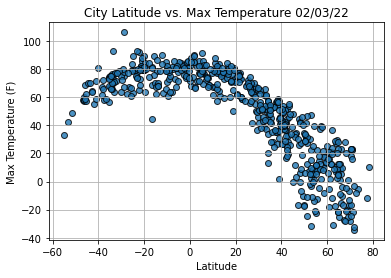

In [57]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

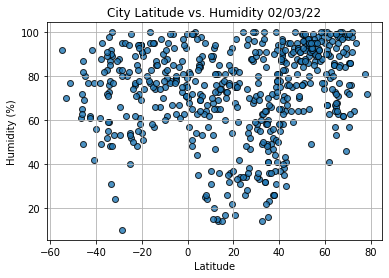

In [58]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

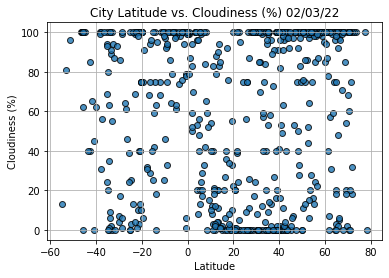

In [59]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

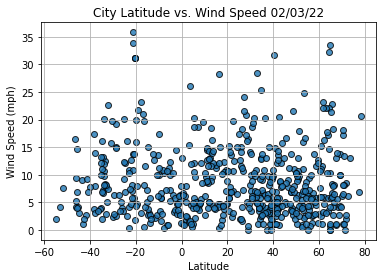

In [60]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [61]:
index13 = city_data_df.loc[13]
index13

City                    Egvekinot
Lat                       66.3167
Lng                     -179.1667
Max Temp                    -10.1
Humidity                       77
Cloudiness                      5
Wind Speed                  18.25
Country                        RU
Date          2022-02-03 05:01:35
Name: 13, dtype: object

In [62]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
562    False
563     True
564     True
565    False
566     True
Name: Lat, Length: 567, dtype: bool

In [63]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Srednekolymsk,67.4500,153.6833,-27.63,100,71,0.92,RU,2022-02-03 05:01:28
3,Torbay,47.6666,-52.7314,26.28,88,75,13.80,CA,2022-02-03 05:00:24
8,Nalut,30.3333,10.8500,41.49,56,8,9.93,LY,2022-02-03 05:01:32
13,Egvekinot,66.3167,-179.1667,-10.10,77,5,18.25,RU,2022-02-03 05:01:35
14,Yellowknife,62.4560,-114.3525,-30.59,82,31,5.99,CA,2022-02-03 05:01:26


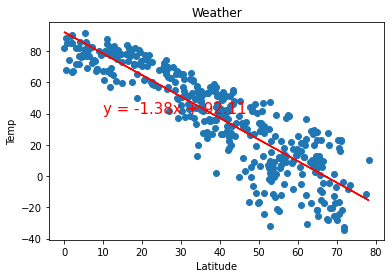

In [64]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title('Weather')
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [65]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [66]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Srednekolymsk,67.4500,153.6833,-27.63,100,71,0.92,RU,2022-02-03 05:01:28
3,Torbay,47.6666,-52.7314,26.28,88,75,13.80,CA,2022-02-03 05:00:24
8,Nalut,30.3333,10.8500,41.49,56,8,9.93,LY,2022-02-03 05:01:32
13,Egvekinot,66.3167,-179.1667,-10.10,77,5,18.25,RU,2022-02-03 05:01:35
14,Yellowknife,62.4560,-114.3525,-30.59,82,31,5.99,CA,2022-02-03 05:01:26


In [67]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [68]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

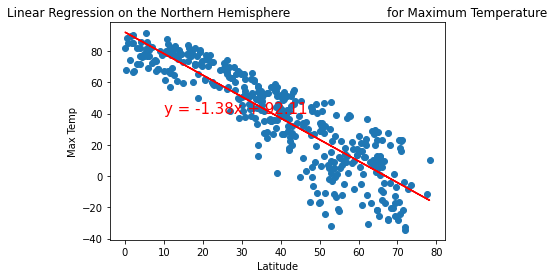

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

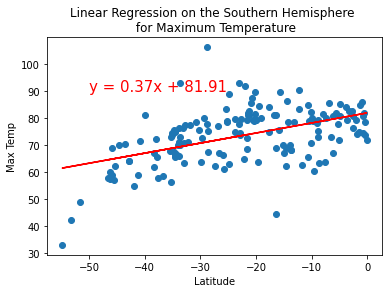

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

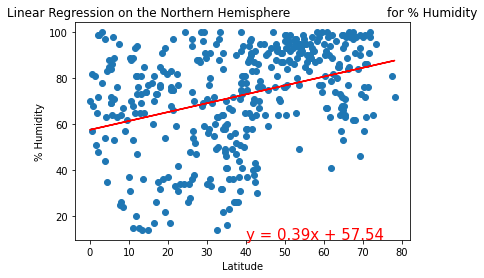

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

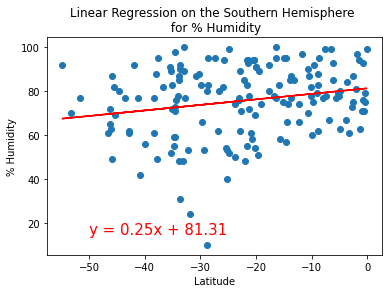

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

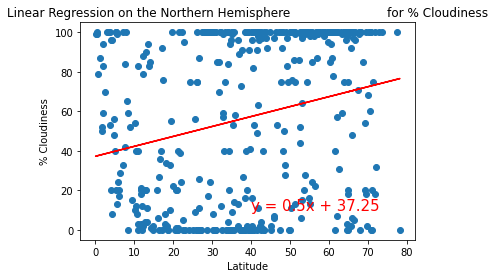

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

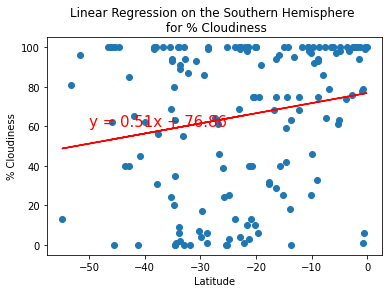

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

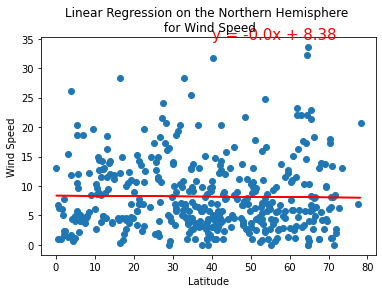

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

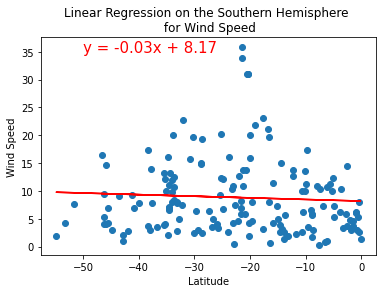

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))